In [255]:
import rasterio
import os
import numpy as np
import geopandas as gpd
import pandas as pd
import datetime
import rasterio.mask as mask
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.ticker as ticker


In [256]:
vrt_file_2019='sentinel5_NO2_2019.vrt'
vrt_file_2019_entire='sentinel5_NO2_2019_entire.vrt'
vrt_file_2020='sentinel5_NO2_2020.vrt'
top_folder='/home/dohyungkim/air_pollution/tif'
plot_dir='/home/dohyungkim/air_pollution/plot'

In [257]:
sen5_2019=rasterio.open(os.path.join(top_folder,vrt_file_2019))
sen5_2019_entire=rasterio.open(os.path.join(top_folder,vrt_file_2019_entire))
sen5_2020=rasterio.open(os.path.join(top_folder,vrt_file_2020))

In [258]:
sen5_2019_entire.count

51

# process for plots

In [259]:
#name of the file for the target city
#wuhan, mexico_city, delhi, Ulaanbaatar, jakarta
ISO='mexico_city'

border_file=os.path.join('/home/dohyungkim/air_pollution/shp',ISO+'_polygon.geojson')
boder=gpd.read_file(border_file)

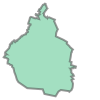

In [260]:
boder['geometry'][0]

In [261]:
def date_range(start, end):
    r = (end+datetime.timedelta(days=1)-start).days
    #print(r)
    return [start+datetime.timedelta(days=i) for i in range(0,r,7)]


In [262]:
def moving_average(y_,window=5):
    return [np.mean(y_[max(0,i-window):i+1]) if i > 0 else y_[i] for i in range(len(y_))]

In [263]:
def get_percent(y1,y2):
    mean=np.nanmean(y1)
    percent=100*(y2-y1)/y1
    return(percent)

In [264]:
year=2019
mon_start=1
date_start=1
mon_end=12
date_end=30

start = datetime.date(year,mon_start,date_start)
end = datetime.date(year,mon_end,date_end)
dateList = date_range(start, end)


In [265]:
dates=[str(date)[-5:] for date in dateList]

In [266]:
df_2019 = pd.DataFrame(np.nan, index=range(len(boder)), columns=dates[:-1])
#df_2020 = pd.DataFrame(np.nan, index=range(len(boder)), columns=dates[:-1])

In [267]:
df_2020

[array([9.52853551e-05, 9.31707305e-05, 8.97176469e-05, 5.85449461e-05,
        5.29616771e-05, 6.59774191e-05, 8.72967761e-05, 8.96757308e-05,
        7.79105206e-05, 1.17619313e-04, 9.73308717e-05, 8.57613194e-05,
        6.69282596e-05, 5.54106236e-05, 5.16796072e-05, 5.34605382e-05,
        5.08292520e-05, 5.33874488e-05])]

In [268]:
geom=[boder['geometry'][0]]
#tmp_2020, tmp_transform = mask.mask(sen5_2020, geom, crop=True)
tmp_2019, tmp_transform = mask.mask(sen5_2019_entire, geom, crop=True)
#co_mean_2020=np.nanmean(tmp_2020, axis=1)
#co_mean_2020=np.nanmean(co_mean_2020, axis=1)
co_mean_2019=np.nanmean(tmp_2019, axis=1)
co_mean_2019=np.nanmean(co_mean_2019, axis=1)
df_2019=list(co_mean_2019.reshape(-1,1).T)
#df_2020=list(co_mean_2020.reshape(-1,1).T)
    

In [269]:
dates

['01-01',
 '01-08',
 '01-15',
 '01-22',
 '01-29',
 '02-05',
 '02-12',
 '02-19',
 '02-26',
 '03-05',
 '03-12',
 '03-19',
 '03-26',
 '04-02',
 '04-09',
 '04-16',
 '04-23',
 '04-30',
 '05-07',
 '05-14',
 '05-21',
 '05-28',
 '06-04',
 '06-11',
 '06-18',
 '06-25',
 '07-02',
 '07-09',
 '07-16',
 '07-23',
 '07-30',
 '08-06',
 '08-13',
 '08-20',
 '08-27',
 '09-03',
 '09-10',
 '09-17',
 '09-24',
 '10-01',
 '10-08',
 '10-15',
 '10-22',
 '10-29',
 '11-05',
 '11-12',
 '11-19',
 '11-26',
 '12-03',
 '12-10',
 '12-17',
 '12-24']

<IPython.core.display.Javascript object>


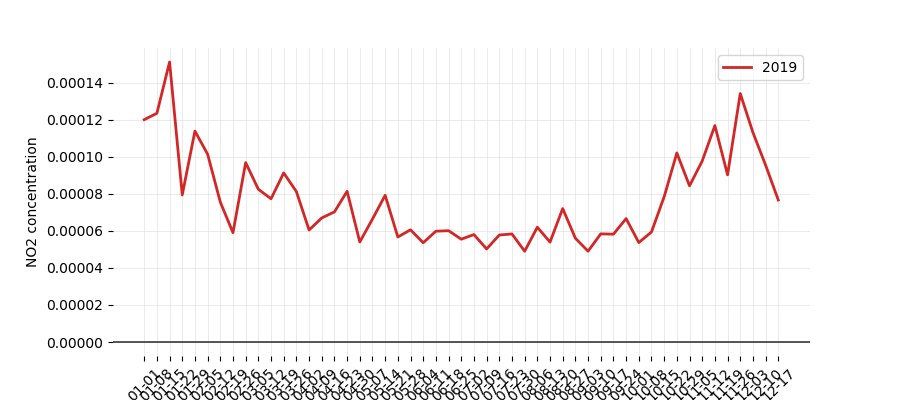

In [270]:
plt.figure(figsize=(9,4))
ax = plt.subplot(111)

x = dates[:-1]
#y_2020 = co_mean_2020
y_2019 = co_mean_2019

# plotting the points
ax.plot(x, y_2019,color='#d32626',lw=2,label="2019") 
#ax.plot(x, y_2020,color='#0068ea',lw=2,label="2020") 
#ax.axvline(x=measures[ISO][0][0],lw=1.1,color='red',ls='--',zorder=2,label=measures[ISO][0][1])
ax.grid(lw=0.5,alpha=0.8,zorder=1)

# naming the x axis 
#ax.set_xlabel('x - axis') 
# naming the y axis 
ax.set_ylabel('NO2 concentration') 
plt.grid(lw=0.5,alpha=0.8,zorder=1,color='#dcdcdc')
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.00%'))
ax.axhline(y=0,color='#282828',ls='-',lw=1.1,zorder=2)
plt.xticks(x, x, rotation=45)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# giving a title to my graph 
#ax.set_title('Air pollution: ' + country_name) 
ax.legend()  

plt.show()
plt.savefig(os.path.join(plot_dir,ISO + '.png'),dpi=300,bbox_inches=0,pad=0)



In [271]:
len(y_2019)

51